In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import regularizers

In [34]:

def _x(t,data):
    return 0 if t < 0 else data[t]

def x(t,data):
    beta = 0.2
    gamma = 0.1
    tau = 25
    n = 10
    return _x(t-1,data) + (beta*_x(t-tau-1,data))/(1+_x(t-tau-1,data)**n) - gamma*_x(t-1,data)

def mackey_glass_generator():


    N = 2000

    data = np.zeros(N)
    data[0] = 1.5

    for t in range(1,N):
        data[t] = x(t,data)

    return data
def get_train_test_data(x):
    train_set = np.zeros([1000,5])
    train_labels = np.zeros([1000])
    
    for t in range(300,1300):
        train_set[t-300,:] = [x[t-20], x[t-15], x[t-10], x[t-5], x[t]]
        train_labels[t-300] = x[t+5] 

    test_set = np.zeros([200,5])
    test_labels = np.zeros([200])
    
    for t in range(1300,1500):
        test_set[t-1300,:] = [x[t-20], x[t-15], x[t-10], x[t-5], x[t]]
        test_labels[t-1300] = x[t+5] 
        
    return train_set, train_labels, test_set, test_labels

def init_network(num_nodes, lambd):
    if len(num_nodes) < 1:
        return None

    model = Sequential()

    num_layers = len(num_nodes)
    model.add(Dense(num_nodes[0], input_dim=5, kernel_initializer='normal', activation='relu',use_bias=True, activity_regularizer=regularizers.l2(lambd)))
    for i in range(1, num_layers):
        model.add(Dense(num_nodes[i], kernel_initializer='normal', activation='relu', use_bias=True, activity_regularizer=regularizers.l2(lambd)))

    model.summary()
    sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='mse')
    es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, min_delta=0.00001, patience=100)
    return model, es

2000


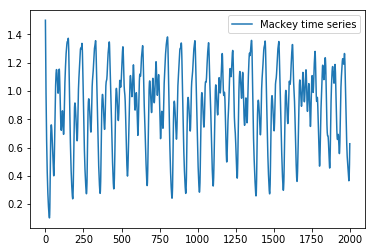

In [35]:
x = mackey_glass_generator()
print(len(x))
t = np.arange(len(x))
plt_A, = plt.plot(t,x, label='Mackey time series')
plt.legend(handles=[plt_A])
plt.show()

In [46]:
train_set, train_labels, test_set, test_labels = get_train_test_data(x)
model, early_stopping = init_network([1000, 1],0.0)

history = model.fit(train_set, train_labels, epochs=10000, batch_size=50, validation_split=0.2,  callbacks=[early_stopping], verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1000)              6000      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 1001      
Total params: 7,001
Trainable params: 7,001
Non-trainable params: 0
_________________________________________________________________
Train on 800 samples, validate on 200 samples
Epoch 1/10000
800/800 [==============================] - 0s 419us/step - loss: 0.1348 - val_loss: 0.0307
Epoch 2/10000
800/800 [==============================] - 0s 38us/step - loss: 0.0296 - val_loss: 0.0206
Epoch 3/10000
800/800 [==============================] - 0s 39us/step - loss: 0.0195 - val_loss: 0.0167
Epoch 4/10000
800/800 [==============================] - 0s 39us/step - loss: 0.0157 - val_loss: 0.0141
Epoch 5/10000
800/800 [==============================] - 0s 38us/step - l

Epoch 73/10000
800/800 [==============================] - 0s 41us/step - loss: 0.0030 - val_loss: 0.0032
Epoch 74/10000
800/800 [==============================] - 0s 34us/step - loss: 0.0030 - val_loss: 0.0032
Epoch 75/10000
800/800 [==============================] - 0s 36us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 76/10000
800/800 [==============================] - 0s 29us/step - loss: 0.0029 - val_loss: 0.0031
Epoch 77/10000
800/800 [==============================] - 0s 30us/step - loss: 0.0029 - val_loss: 0.0031
Epoch 78/10000
800/800 [==============================] - 0s 33us/step - loss: 0.0029 - val_loss: 0.0031
Epoch 79/10000
800/800 [==============================] - 0s 29us/step - loss: 0.0028 - val_loss: 0.0030
Epoch 80/10000
800/800 [==============================] - 0s 30us/step - loss: 0.0028 - val_loss: 0.0030
Epoch 81/10000
800/800 [==============================] - 0s 33us/step - loss: 0.0028 - val_loss: 0.0030
Epoch 82/10000
800/800 [==============================]

800/800 [==============================] - 0s 34us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 151/10000
800/800 [==============================] - 0s 39us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 152/10000
800/800 [==============================] - 0s 37us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 153/10000
800/800 [==============================] - 0s 35us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 154/10000
800/800 [==============================] - 0s 30us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 155/10000
800/800 [==============================] - 0s 31us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 156/10000
800/800 [==============================] - 0s 33us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 157/10000
800/800 [==============================] - 0s 33us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 158/10000
800/800 [==============================] - 0s 31us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 159/10000
800/800 [==============================] - 0s 

800/800 [==============================] - 0s 33us/step - loss: 0.0013 - val_loss: 0.0014
Epoch 228/10000
800/800 [==============================] - 0s 38us/step - loss: 0.0013 - val_loss: 0.0014
Epoch 229/10000
800/800 [==============================] - 0s 34us/step - loss: 0.0013 - val_loss: 0.0013
Epoch 230/10000
800/800 [==============================] - 0s 36us/step - loss: 0.0013 - val_loss: 0.0013
Epoch 231/10000
800/800 [==============================] - 0s 33us/step - loss: 0.0013 - val_loss: 0.0014
Epoch 232/10000
800/800 [==============================] - 0s 58us/step - loss: 0.0013 - val_loss: 0.0014
Epoch 233/10000
800/800 [==============================] - 0s 58us/step - loss: 0.0013 - val_loss: 0.0014
Epoch 234/10000
800/800 [==============================] - 0s 51us/step - loss: 0.0013 - val_loss: 0.0013
Epoch 235/10000
800/800 [==============================] - 0s 59us/step - loss: 0.0013 - val_loss: 0.0013
Epoch 236/10000
800/800 [==============================] - 0s 

800/800 [==============================] - 0s 41us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 305/10000
800/800 [==============================] - 0s 43us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 306/10000
800/800 [==============================] - 0s 41us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 307/10000
800/800 [==============================] - 0s 41us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 308/10000
800/800 [==============================] - 0s 38us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 309/10000
800/800 [==============================] - 0s 33us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 310/10000
800/800 [==============================] - 0s 35us/step - loss: 0.0011 - val_loss: 0.0012
Epoch 311/10000
800/800 [==============================] - 0s 54us/step - loss: 0.0011 - val_loss: 0.0012
Epoch 312/10000
800/800 [==============================] - 0s 37us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 313/10000
800/800 [==============================] - 0s 

800/800 [==============================] - 0s 35us/step - loss: 0.0011 - val_loss: 0.0012
Epoch 382/10000
800/800 [==============================] - 0s 35us/step - loss: 0.0011 - val_loss: 0.0012
Epoch 383/10000
800/800 [==============================] - 0s 31us/step - loss: 0.0011 - val_loss: 0.0012
Epoch 384/10000
800/800 [==============================] - 0s 30us/step - loss: 0.0011 - val_loss: 0.0012
Epoch 385/10000
800/800 [==============================] - 0s 32us/step - loss: 0.0011 - val_loss: 0.0012
Epoch 386/10000
800/800 [==============================] - 0s 29us/step - loss: 0.0011 - val_loss: 0.0013
Epoch 387/10000
800/800 [==============================] - 0s 215us/step - loss: 0.0011 - val_loss: 0.0013
Epoch 388/10000
800/800 [==============================] - 0s 51us/step - loss: 0.0011 - val_loss: 0.0012
Epoch 389/10000
800/800 [==============================] - 0s 57us/step - loss: 0.0011 - val_loss: 0.0012
Epoch 390/10000
800/800 [==============================] - 0s

800/800 [==============================] - 0s 39us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 459/10000
800/800 [==============================] - 0s 48us/step - loss: 0.0011 - val_loss: 0.0012
Epoch 460/10000
800/800 [==============================] - 0s 52us/step - loss: 0.0010 - val_loss: 0.0011
Epoch 461/10000
800/800 [==============================] - 0s 52us/step - loss: 0.0010 - val_loss: 0.0012
Epoch 462/10000
800/800 [==============================] - 0s 45us/step - loss: 0.0010 - val_loss: 0.0011
Epoch 463/10000
800/800 [==============================] - 0s 48us/step - loss: 0.0010 - val_loss: 0.0012
Epoch 464/10000
800/800 [==============================] - 0s 38us/step - loss: 0.0010 - val_loss: 0.0012
Epoch 465/10000
800/800 [==============================] - 0s 49us/step - loss: 0.0010 - val_loss: 0.0011
Epoch 466/10000
800/800 [==============================] - 0s 42us/step - loss: 0.0010 - val_loss: 0.0012
Epoch 467/10000
800/800 [==============================] - 0s 

800/800 [==============================] - 0s 40us/step - loss: 0.0010 - val_loss: 0.0011
Epoch 536/10000
800/800 [==============================] - 0s 42us/step - loss: 0.0010 - val_loss: 0.0011
Epoch 537/10000
800/800 [==============================] - 0s 48us/step - loss: 9.8867e-04 - val_loss: 0.0012
Epoch 538/10000
800/800 [==============================] - 0s 44us/step - loss: 9.9101e-04 - val_loss: 0.0011
Epoch 539/10000
800/800 [==============================] - 0s 40us/step - loss: 0.0010 - val_loss: 0.0012
Epoch 540/10000
800/800 [==============================] - 0s 45us/step - loss: 0.0010 - val_loss: 0.0012
Epoch 541/10000
800/800 [==============================] - 0s 44us/step - loss: 9.8938e-04 - val_loss: 0.0011
Epoch 542/10000
800/800 [==============================] - 0s 52us/step - loss: 9.9228e-04 - val_loss: 0.0011
Epoch 543/10000
800/800 [==============================] - 0s 42us/step - loss: 9.8767e-04 - val_loss: 0.0013
Epoch 544/10000
800/800 [=================

800/800 [==============================] - 0s 35us/step - loss: 9.6450e-04 - val_loss: 0.0011
Epoch 611/10000
800/800 [==============================] - 0s 29us/step - loss: 9.7749e-04 - val_loss: 0.0011
Epoch 612/10000
800/800 [==============================] - 0s 39us/step - loss: 9.6241e-04 - val_loss: 0.0010
Epoch 613/10000
800/800 [==============================] - 0s 32us/step - loss: 9.7404e-04 - val_loss: 0.0011
Epoch 614/10000
800/800 [==============================] - 0s 29us/step - loss: 9.8657e-04 - val_loss: 0.0011
Epoch 615/10000
800/800 [==============================] - 0s 29us/step - loss: 9.8907e-04 - val_loss: 0.0012
Epoch 616/10000
800/800 [==============================] - 0s 30us/step - loss: 9.9884e-04 - val_loss: 0.0011
Epoch 617/10000
800/800 [==============================] - 0s 30us/step - loss: 9.6070e-04 - val_loss: 0.0011
Epoch 618/10000
800/800 [==============================] - 0s 31us/step - loss: 9.7506e-04 - val_loss: 0.0011
Epoch 619/10000
800/800 [=

800/800 [==============================] - 0s 32us/step - loss: 9.4219e-04 - val_loss: 0.0012
Epoch 685/10000
800/800 [==============================] - 0s 30us/step - loss: 9.3505e-04 - val_loss: 0.0011
Epoch 686/10000
800/800 [==============================] - 0s 36us/step - loss: 9.3157e-04 - val_loss: 0.0011
Epoch 687/10000
800/800 [==============================] - 0s 35us/step - loss: 9.3945e-04 - val_loss: 0.0011
Epoch 688/10000
800/800 [==============================] - 0s 34us/step - loss: 9.3267e-04 - val_loss: 0.0010
Epoch 689/10000
800/800 [==============================] - 0s 34us/step - loss: 9.3810e-04 - val_loss: 0.0011
Epoch 690/10000
800/800 [==============================] - 0s 36us/step - loss: 9.3714e-04 - val_loss: 0.0011
Epoch 691/10000
800/800 [==============================] - 0s 34us/step - loss: 9.3672e-04 - val_loss: 0.0013
Epoch 692/10000
800/800 [==============================] - 0s 33us/step - loss: 9.3537e-04 - val_loss: 0.0011
Epoch 693/10000
800/800 [=

800/800 [==============================] - 0s 32us/step - loss: 9.2916e-04 - val_loss: 0.0011
Epoch 759/10000
800/800 [==============================] - 0s 34us/step - loss: 9.2108e-04 - val_loss: 0.0010
Epoch 760/10000
800/800 [==============================] - 0s 29us/step - loss: 9.4081e-04 - val_loss: 0.0010
Epoch 761/10000
800/800 [==============================] - 0s 32us/step - loss: 9.1759e-04 - val_loss: 0.0010
Epoch 762/10000
800/800 [==============================] - 0s 37us/step - loss: 9.1801e-04 - val_loss: 0.0011
Epoch 763/10000
800/800 [==============================] - 0s 39us/step - loss: 9.3021e-04 - val_loss: 0.0010
Epoch 764/10000
800/800 [==============================] - 0s 48us/step - loss: 9.0916e-04 - val_loss: 0.0010
Epoch 765/10000
800/800 [==============================] - 0s 47us/step - loss: 9.1758e-04 - val_loss: 0.0010
Epoch 766/10000
800/800 [==============================] - 0s 43us/step - loss: 9.1512e-04 - val_loss: 0.0011
Epoch 767/10000
800/800 [=

800/800 [==============================] - 0s 34us/step - loss: 9.0873e-04 - val_loss: 0.0010
Epoch 833/10000
800/800 [==============================] - 0s 34us/step - loss: 8.9383e-04 - val_loss: 0.0010
Epoch 834/10000
800/800 [==============================] - 0s 33us/step - loss: 8.9145e-04 - val_loss: 0.0010
Epoch 835/10000
800/800 [==============================] - 0s 29us/step - loss: 9.0107e-04 - val_loss: 0.0010
Epoch 836/10000
800/800 [==============================] - 0s 33us/step - loss: 8.9051e-04 - val_loss: 0.0010
Epoch 837/10000
800/800 [==============================] - 0s 28us/step - loss: 8.8705e-04 - val_loss: 9.8305e-04
Epoch 838/10000
800/800 [==============================] - 0s 32us/step - loss: 8.9251e-04 - val_loss: 0.0011
Epoch 839/10000
800/800 [==============================] - 0s 31us/step - loss: 8.9050e-04 - val_loss: 9.8348e-04
Epoch 840/10000
800/800 [==============================] - 0s 28us/step - loss: 8.9978e-04 - val_loss: 0.0011
Epoch 841/10000
80

800/800 [==============================] - 0s 36us/step - loss: 8.7044e-04 - val_loss: 0.0011
Epoch 906/10000
800/800 [==============================] - 0s 32us/step - loss: 8.8337e-04 - val_loss: 0.0011
Epoch 907/10000
800/800 [==============================] - 0s 32us/step - loss: 8.7642e-04 - val_loss: 0.0010
Epoch 908/10000
800/800 [==============================] - 0s 33us/step - loss: 8.6766e-04 - val_loss: 0.0012
Epoch 909/10000
800/800 [==============================] - 0s 32us/step - loss: 8.8190e-04 - val_loss: 9.9877e-04
Epoch 910/10000
800/800 [==============================] - 0s 29us/step - loss: 8.7323e-04 - val_loss: 0.0010
Epoch 911/10000
800/800 [==============================] - 0s 32us/step - loss: 8.7536e-04 - val_loss: 0.0010
Epoch 912/10000
800/800 [==============================] - 0s 33us/step - loss: 8.7725e-04 - val_loss: 0.0010
Epoch 913/10000
800/800 [==============================] - 0s 35us/step - loss: 8.7570e-04 - val_loss: 9.9762e-04
Epoch 914/10000
80

800/800 [==============================] - 0s 29us/step - loss: 8.6227e-04 - val_loss: 0.0010
Epoch 979/10000
800/800 [==============================] - 0s 33us/step - loss: 8.7756e-04 - val_loss: 9.8387e-04
Epoch 980/10000
800/800 [==============================] - 0s 31us/step - loss: 8.5709e-04 - val_loss: 0.0010
Epoch 981/10000
800/800 [==============================] - 0s 32us/step - loss: 8.5302e-04 - val_loss: 0.0010
Epoch 982/10000
800/800 [==============================] - 0s 37us/step - loss: 8.5366e-04 - val_loss: 9.6362e-04
Epoch 983/10000
800/800 [==============================] - 0s 32us/step - loss: 8.6444e-04 - val_loss: 9.5376e-04
Epoch 984/10000
800/800 [==============================] - 0s 34us/step - loss: 8.6111e-04 - val_loss: 9.4808e-04
Epoch 985/10000
800/800 [==============================] - 0s 36us/step - loss: 8.5807e-04 - val_loss: 0.0010
Epoch 986/10000
800/800 [==============================] - 0s 35us/step - loss: 8.5079e-04 - val_loss: 9.4548e-04
Epoch 

Epoch 1051/10000
800/800 [==============================] - 0s 36us/step - loss: 8.4988e-04 - val_loss: 9.4223e-04
Epoch 1052/10000
800/800 [==============================] - 0s 40us/step - loss: 8.5848e-04 - val_loss: 9.8763e-04
Epoch 1053/10000
800/800 [==============================] - 0s 48us/step - loss: 8.4527e-04 - val_loss: 9.4335e-04
Epoch 1054/10000
800/800 [==============================] - 0s 56us/step - loss: 8.3705e-04 - val_loss: 0.0011
Epoch 1055/10000
800/800 [==============================] - 0s 46us/step - loss: 8.3883e-04 - val_loss: 9.7124e-04
Epoch 1056/10000
800/800 [==============================] - 0s 37us/step - loss: 8.3572e-04 - val_loss: 0.0011
Epoch 1057/10000
800/800 [==============================] - 0s 56us/step - loss: 8.3776e-04 - val_loss: 9.7128e-04
Epoch 1058/10000
800/800 [==============================] - 0s 59us/step - loss: 8.4366e-04 - val_loss: 0.0010
Epoch 1059/10000
800/800 [==============================] - 0s 61us/step - loss: 8.5575e-04 

800/800 [==============================] - 0s 41us/step - loss: 8.2020e-04 - val_loss: 9.7233e-04
Epoch 1124/10000
800/800 [==============================] - 0s 40us/step - loss: 8.2843e-04 - val_loss: 9.5416e-04
Epoch 1125/10000
800/800 [==============================] - 0s 36us/step - loss: 8.2394e-04 - val_loss: 9.4250e-04
Epoch 1126/10000
800/800 [==============================] - 0s 36us/step - loss: 8.3426e-04 - val_loss: 0.0012
Epoch 1127/10000
800/800 [==============================] - 0s 38us/step - loss: 8.2136e-04 - val_loss: 0.0013
Epoch 1128/10000
800/800 [==============================] - 0s 36us/step - loss: 8.3965e-04 - val_loss: 9.7881e-04
Epoch 1129/10000
800/800 [==============================] - 0s 35us/step - loss: 8.1662e-04 - val_loss: 9.8252e-04
Epoch 1130/10000
800/800 [==============================] - 0s 36us/step - loss: 8.2780e-04 - val_loss: 9.5180e-04
Epoch 1131/10000
800/800 [==============================] - 0s 34us/step - loss: 8.1468e-04 - val_loss: 9

800/800 [==============================] - 0s 39us/step - loss: 8.0564e-04 - val_loss: 9.2402e-04
Epoch 1196/10000
800/800 [==============================] - 0s 36us/step - loss: 8.1050e-04 - val_loss: 9.7069e-04
Epoch 1197/10000
800/800 [==============================] - 0s 32us/step - loss: 8.1347e-04 - val_loss: 9.4083e-04
Epoch 1198/10000
800/800 [==============================] - 0s 33us/step - loss: 8.2246e-04 - val_loss: 9.8267e-04
Epoch 1199/10000
800/800 [==============================] - 0s 29us/step - loss: 8.1220e-04 - val_loss: 9.8975e-04
Epoch 1200/10000
800/800 [==============================] - 0s 31us/step - loss: 8.0703e-04 - val_loss: 9.4395e-04
Epoch 1201/10000
800/800 [==============================] - 0s 30us/step - loss: 8.2887e-04 - val_loss: 9.7178e-04
Epoch 1202/10000
800/800 [==============================] - 0s 30us/step - loss: 8.2083e-04 - val_loss: 9.3812e-04
Epoch 1203/10000
800/800 [==============================] - 0s 31us/step - loss: 8.1606e-04 - val

Epoch 1267/10000
800/800 [==============================] - 0s 40us/step - loss: 7.9593e-04 - val_loss: 9.2889e-04
Epoch 1268/10000
800/800 [==============================] - 0s 34us/step - loss: 8.0437e-04 - val_loss: 9.8988e-04
Epoch 1269/10000
800/800 [==============================] - 0s 29us/step - loss: 7.9004e-04 - val_loss: 9.1169e-04
Epoch 1270/10000
800/800 [==============================] - 0s 30us/step - loss: 8.1417e-04 - val_loss: 9.0976e-04
Epoch 1271/10000
800/800 [==============================] - 0s 32us/step - loss: 8.0333e-04 - val_loss: 0.0011
Epoch 1272/10000
800/800 [==============================] - 0s 30us/step - loss: 7.9747e-04 - val_loss: 9.3683e-04
Epoch 1273/10000
800/800 [==============================] - 0s 30us/step - loss: 7.9541e-04 - val_loss: 9.4287e-04
Epoch 1274/10000
800/800 [==============================] - 0s 30us/step - loss: 8.0358e-04 - val_loss: 0.0011
Epoch 1275/10000
800/800 [==============================] - 0s 29us/step - loss: 8.0445e

800/800 [==============================] - 0s 30us/step - loss: 7.9641e-04 - val_loss: 9.2988e-04
Epoch 1339/10000
800/800 [==============================] - 0s 28us/step - loss: 7.7933e-04 - val_loss: 0.0011
Epoch 1340/10000
800/800 [==============================] - 0s 36us/step - loss: 7.7762e-04 - val_loss: 9.8022e-04
Epoch 1341/10000
800/800 [==============================] - 0s 31us/step - loss: 7.8504e-04 - val_loss: 9.0312e-04
Epoch 1342/10000
800/800 [==============================] - 0s 30us/step - loss: 7.8987e-04 - val_loss: 0.0010
Epoch 1343/10000
800/800 [==============================] - 0s 29us/step - loss: 7.7804e-04 - val_loss: 8.9322e-04
Epoch 1344/10000
800/800 [==============================] - 0s 30us/step - loss: 7.8668e-04 - val_loss: 9.8845e-04
Epoch 1345/10000
800/800 [==============================] - 0s 29us/step - loss: 7.8481e-04 - val_loss: 9.0290e-04
Epoch 1346/10000
800/800 [==============================] - 0s 30us/step - loss: 7.8261e-04 - val_loss: 0

Epoch 1410/10000
800/800 [==============================] - 0s 31us/step - loss: 7.6195e-04 - val_loss: 9.4232e-04
Epoch 1411/10000
800/800 [==============================] - 0s 30us/step - loss: 7.5955e-04 - val_loss: 9.2078e-04
Epoch 1412/10000
800/800 [==============================] - 0s 31us/step - loss: 7.8340e-04 - val_loss: 9.2983e-04
Epoch 1413/10000
800/800 [==============================] - 0s 30us/step - loss: 7.7407e-04 - val_loss: 8.9201e-04
Epoch 1414/10000
800/800 [==============================] - 0s 31us/step - loss: 7.7104e-04 - val_loss: 9.6068e-04
Epoch 1415/10000
800/800 [==============================] - 0s 33us/step - loss: 7.8210e-04 - val_loss: 0.0010
Epoch 1416/10000
800/800 [==============================] - 0s 33us/step - loss: 7.7106e-04 - val_loss: 9.0970e-04
Epoch 1417/10000
800/800 [==============================] - 0s 34us/step - loss: 7.5647e-04 - val_loss: 9.0161e-04
Epoch 1418/10000
800/800 [==============================] - 0s 32us/step - loss: 7.6

800/800 [==============================] - 0s 28us/step - loss: 7.4999e-04 - val_loss: 0.0011
Epoch 1482/10000
800/800 [==============================] - 0s 34us/step - loss: 7.4842e-04 - val_loss: 8.6948e-04
Epoch 1483/10000
800/800 [==============================] - 0s 30us/step - loss: 7.7087e-04 - val_loss: 8.6015e-04
Epoch 1484/10000
800/800 [==============================] - 0s 31us/step - loss: 7.5192e-04 - val_loss: 9.5606e-04
Epoch 1485/10000
800/800 [==============================] - 0s 29us/step - loss: 7.5031e-04 - val_loss: 8.8193e-04
Epoch 1486/10000
800/800 [==============================] - 0s 31us/step - loss: 7.4782e-04 - val_loss: 0.0011
Epoch 1487/10000
800/800 [==============================] - 0s 32us/step - loss: 7.5939e-04 - val_loss: 9.3176e-04
Epoch 1488/10000
800/800 [==============================] - 0s 30us/step - loss: 7.7611e-04 - val_loss: 8.9764e-04
Epoch 1489/10000
800/800 [==============================] - 0s 29us/step - loss: 7.5105e-04 - val_loss: 8

800/800 [==============================] - 0s 31us/step - loss: 7.4400e-04 - val_loss: 8.8847e-04
Epoch 1553/10000
800/800 [==============================] - 0s 28us/step - loss: 7.4932e-04 - val_loss: 8.6742e-04
Epoch 1554/10000
800/800 [==============================] - 0s 32us/step - loss: 7.4860e-04 - val_loss: 9.5828e-04
Epoch 1555/10000
800/800 [==============================] - 0s 31us/step - loss: 7.5493e-04 - val_loss: 9.0151e-04
Epoch 1556/10000
800/800 [==============================] - 0s 31us/step - loss: 7.3912e-04 - val_loss: 8.9182e-04
Epoch 1557/10000
800/800 [==============================] - 0s 31us/step - loss: 7.4217e-04 - val_loss: 0.0010
Epoch 1558/10000
800/800 [==============================] - 0s 30us/step - loss: 7.4365e-04 - val_loss: 8.6786e-04
Epoch 1559/10000
800/800 [==============================] - 0s 32us/step - loss: 7.4622e-04 - val_loss: 9.3232e-04
Epoch 1560/10000
800/800 [==============================] - 0s 30us/step - loss: 7.4482e-04 - val_los

MSE: 0.19471321561298904


Text(0.5, 1.0, 'Mackey-Glass Time Series (x(0) = 1.5)')

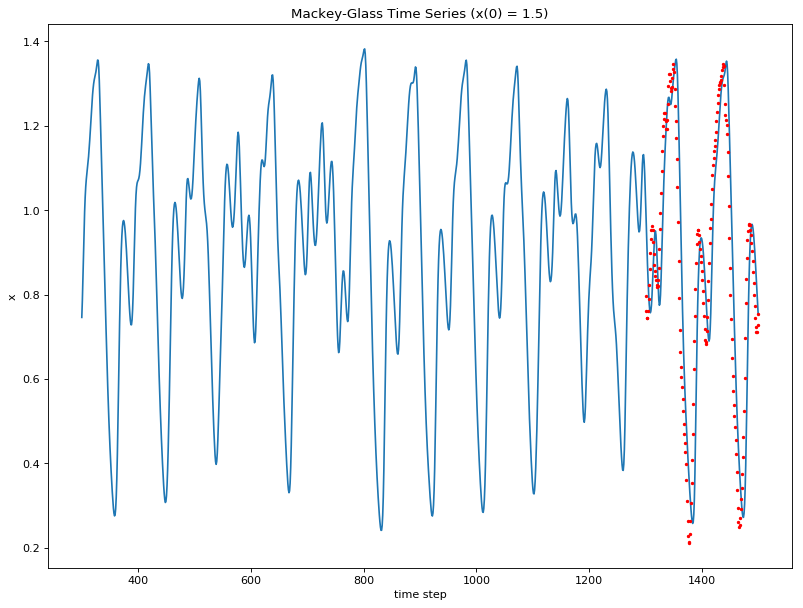

In [47]:
def error_mse(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.mean(((Y-T)**2))
predictions = model.predict(test_set, verbose=0)
print("MSE:",error_mse(test_labels,predictions))


figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
t = np.arange(301,len(x)-500)
plt.plot(t,x[301:len(x)-500])
plt.plot(range(1300,1500),predictions,'ro',markersize=2)
plt.xlabel("time step")
plt.ylabel("x")
plt.title("Mackey-Glass Time Series (x(0) = 1.5)")